In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

from statistics import mean

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B0C391F98>,
      dtype=object)

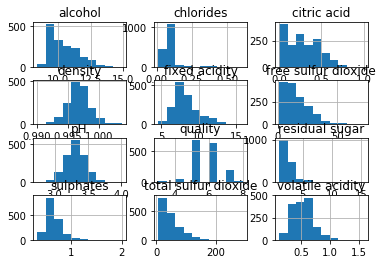

In [5]:
data.hist()

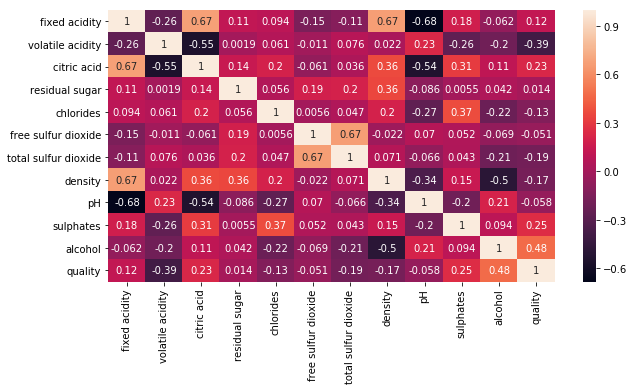

In [6]:
f = (data).corr()
plt.figure(figsize = (10, 5))
sns.heatmap(f, annot=True)

In [7]:
data.dropna(axis = 0, subset = ['quality'], inplace = True)
y = data.quality
X = data.drop(['quality'], axis=1).select_dtypes(exclude=['object'])

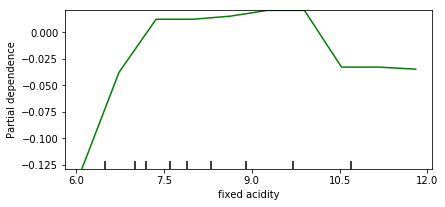

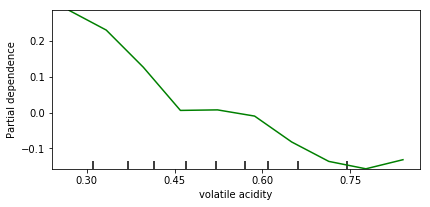

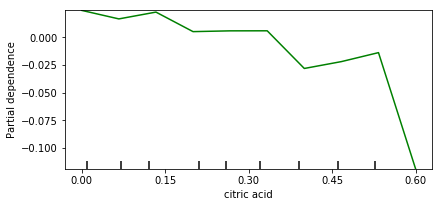

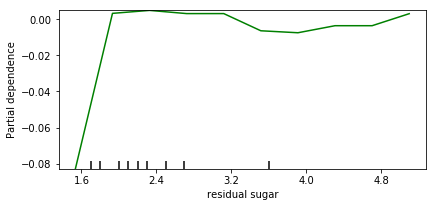

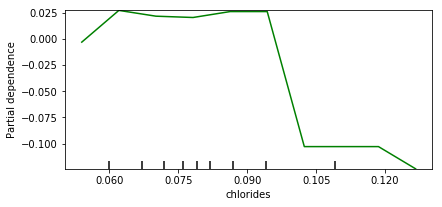

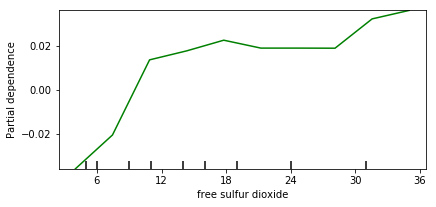

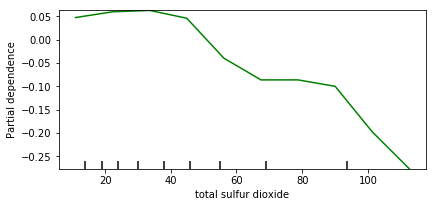

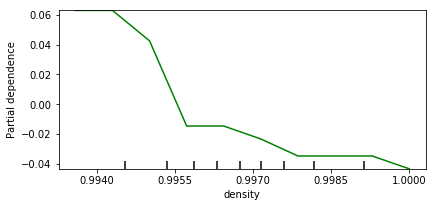

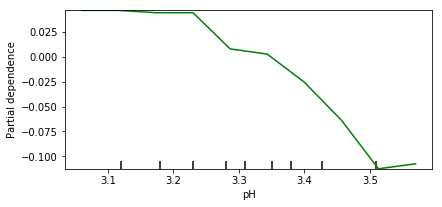

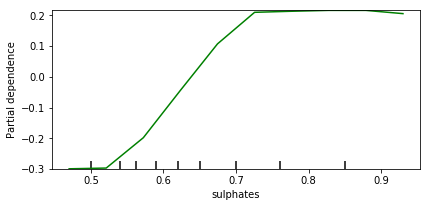

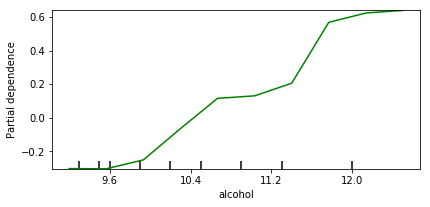

In [10]:
imputed_X_plus = X.copy()
cols_with_missing = (col for col in X.columns if X[col].isnull().any())
for col in cols_with_missing:
    print(col + 'was missing a value')
    imputed_X_plus[col + '_was_missing'] = imputed_X_plus[col].isnull()
my_imputer = SimpleImputer()
imputed_X_plus = my_imputer.fit_transform(imputed_X_plus)
cols = X.columns
my_model = GradientBoostingRegressor()
my_model.fit(imputed_X_plus, y)
for _ in range(len(cols)):
    my_plots = plot_partial_dependence(my_model, features = [_], X = imputed_X_plus, feature_names = cols,
                                       grid_resolution = 10)

# Classification